## Scrap notebook with random functions and code just to get started on the entire NLP Process

In [154]:
#Importing necessary packages and libraries
import twint
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [155]:
#necessary packages
from nltk.tokenize import RegexpTokenizer
import re

In [156]:
#scraped CSV into dataframe
df=pd.read_csv('Jeff.csv')
df.shape

(7137, 35)

In [157]:
data=df

In [158]:
#creating word bank from tweets
BoW=[]
for word in data['tweet']:
    BoW.append(word)
len(BoW)

7137

In [159]:
#further processing of BoW into a corpus
word_bank= ' '.join(BoW)
word_bank= word_bank.lower()
word_bank

' https://twitter.com/drawandstrike/status/1279805238556397569?s=19\xa0…\n\nlet me know when blm marxist scum is marching for this little girl and the 6000+ black people murdered by other black people in the us every year. till then... #alllivesmatter racism is the idol that feeds the  beast of #blacklivesmatter\nrev 13:17\n\n#alllivesmatter or no life does. powerful picture of the real state of race relations in america. #alllivesmatter \ngod bless these heroes! ✝️🇺🇸  https://twitter.com/pasreport/status/1284219448250048513\xa0… looks like yet another black criminal dealt with in the harsh manner they deserve #alllivesmatter i saw you on the news, know the truth and your response will bring a just consequence!! i own the copyrighted sermon, where the system of matter movements/lives matter generated!\n#alllivesmatter © & #blacklivesmatter© are my sentences..hijacked, sold & prostituted! #blm© is holy! how abt u go away. there r other dr\'s that disagree. so u appear 2 have the same"go

In [160]:
#looking at sample tweet
data['tweet'][9]

'So basically you are funding the militarization of BLM and Aintifa\nTake your money out of @BankofAmerica. \n#TheGreatAwakening #TheStormIsUponUs #AllLivesMatter  https://twitter.com/BofA_News/status/1267788917660516354\xa0…'

In [161]:
#tokenizing our word bank
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= tokenizer.tokenize(word_bank)

In [162]:
#our tokens
tokenized_tweets

['https',
 'twitter',
 'com',
 'drawandstrike',
 'status',
 's',
 'let',
 'me',
 'know',
 'when',
 'blm',
 'marxist',
 'scum',
 'is',
 'marching',
 'for',
 'this',
 'little',
 'girl',
 'and',
 'the',
 'black',
 'people',
 'murdered',
 'by',
 'other',
 'black',
 'people',
 'in',
 'the',
 'us',
 'every',
 'year',
 'till',
 'then',
 'alllivesmatter',
 'racism',
 'is',
 'the',
 'idol',
 'that',
 'feeds',
 'the',
 'beast',
 'of',
 'blacklivesmatter',
 'rev',
 'alllivesmatter',
 'or',
 'no',
 'life',
 'does',
 'powerful',
 'picture',
 'of',
 'the',
 'real',
 'state',
 'of',
 'race',
 'relations',
 'in',
 'america',
 'alllivesmatter',
 'god',
 'bless',
 'these',
 'heroes',
 'https',
 'twitter',
 'com',
 'pasreport',
 'status',
 'looks',
 'like',
 'yet',
 'another',
 'black',
 'criminal',
 'dealt',
 'with',
 'in',
 'the',
 'harsh',
 'manner',
 'they',
 'deserve',
 'alllivesmatter',
 'i',
 'saw',
 'you',
 'on',
 'the',
 'news',
 'know',
 'the',
 'truth',
 'and',
 'your',
 'response',
 'will',
 

In [163]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter']
sw_set = set(sw_list)

In [164]:
#list of stopwords and punctuation
print(sw_set)

{'}', "weren't", 'further', "that'll", 'about', 'than', "mightn't", 'more', 'll', 'needn', 'alllivesmatter', 'what', 'whom', 'which', "you've", 'my', 'be', 'as', 'below', ']', "''", "didn't", 'and', 'she', 'most', "don't", 'hasn', 'they', 'after', 'any', 'me', 'wasn', 'but', "doesn't", 'until', '.', 'weren', 'ma', 'into', 'm', 'one', 'that', '{', 'had', 'once', 'again', "hadn't", 'there', '!', 'himself', 'them', 'does', 'how', ';', 'wouldn', "you're", 's', "wouldn't", 'bluelivesmatter', 're', 'why', "it's", 'here', 'or', "wasn't", 'same', "you'd", 'few', 'only', 'you', '%', 't', 'his', 'don', "mustn't", 'i', 'through', 'on', '–', 'while', "won't", 'its', 'd', "'", 'by', 'can', '_', 'didn', 'mightn', '|', 'your', 'y', 'do', 'doing', "hasn't", 'hadn', "she's", 'it', '=', 'shan', '``', "you'll", 'both', 'having', 'so', 'shouldn', 'before', 've', 'when', 'yours', 'aren', 'of', 'some', 'her', '[', 'own', '>', 'ain', 'who', 'now', ')', "isn't", '`', '”', 'ours', 'our', 'o', 'between', 'twitt

In [143]:
#filtering for stop words
filtered_tweets=[]
for word in tokenized_tweets:
    if word not in sw_set:
        filtered_tweets.append(word)
      

In [166]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))
print (lemmatized_tweets)

['fund', 'defense', 'trump', 'landslidevictory', 'life', 'matter', 'dems', 'ever', 'get', 'charge', 'better', 'get', 'gun', 'realdonaldtrump', 'potus', 'presssec', 'whitehouse', 'alm', 'bluelivesmtr', 'blm', 'thereval', 'foxnews', 'abcnews', 'nbcnews', 'gop', 'thedemocrats', 'speakerpelosi', 'senschumer', 'joebiden', 'realdonaldtrump', 'status', 'yes', 'mean', 'equality', 'regardless', 'color', 'race', 'religion', 'sexual', 'preference', 'etc', 'human', 'bleed', 'color', 'expect', 'numptys', 'lemming', 'jump', 'cliff', 'follow', 'devoid', 'brain', 'idiot', 'clue', 'law', 'doctor', 'must', 'dr', 'colored', 'eyebrow', 'white', 'woman', 'color', 'lmao', 'attack', 'helicopter', 'another', 'person', 'capable', 'thinking', 'logically', 'word', 'trump', 'involved', 'order', 'police', 'stand', 'ridiculous', 'mural', 'stand', 'throwing', 'blue', 'paint', 'police', 'arrest', 'arrest', 'billdeblasio', 'traitor', 'evil', 'tyranny', 'cannot', 'go', 'unpunished', 'barack', 'hussein', 'obama', 'hilla

In [145]:
#observing the frequency of common words in the corpus
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

status             929
life               748
pic                704
black              662
blm                601
matter             544
people             524
trump              425
realdonaldtrump    371
racist             347
white              313
news               282
police             270
get                268
u                  218
right              202
cspanwj            201
facebook           196
say                192
hate               189
america            187
want               185
like               184
breakingnews       182
backtheblue        181
maga               180
know               176
support            173
love               169
stop               157
would              153
let                152
breaking           148
need               143
terrorist          142
see                140
group              137
child              136
god                136
video              135
cop                132
racism             131
antifa             127
good       

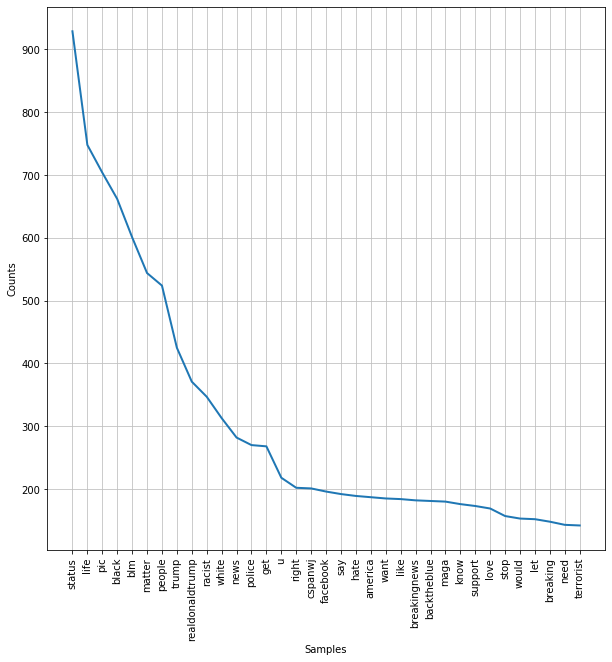

In [167]:
#observing the frequency distribution of popular words in corpus
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,10))
fdist.plot(35)

In [168]:
#vectorizing using the frequent words 
vec=CountVectorizer(stop_words=sw_set, ngram_range=(1,3))
X=vec.fit(lemmatized_tweets)
X=vec.transform(lemmatized_tweets)

In [169]:
#putting vectorized data into a dataframe
df_wordvec = pd.DataFrame(X.todense(), columns = vec.get_feature_names())
df_wordvec.columns

Index(['aaj', 'aajtak', 'aau', 'ab', 'abcnews', 'abducted', 'abide', 'abiding',
       'ability', 'able',
       ...
       'zrmbrgeyjm', 'zruy', 'zsywoqzk', 'zt', 'zu', 'zubymusic', 'zvg', 'zw',
       'zyrbhhbmw', 'zz'],
      dtype='object', length=7855)

In [170]:
#a look at all of the tweets
data['tweet']

0        https://twitter.com/drawandstrike/status/1279...
1       RACISM IS THE IDOL THAT FEEDS THE  BEAST OF #b...
2       Powerful picture of the REAL state of race rel...
3       Looks like yet another black criminal dealt wi...
4       I SAW YOU ON THE NEWS, KNOW THE TRUTH AND YOUR...
                              ...                        
7132    #AllLivesMatter #BlueLivesMatter and #OurCount...
7133    @ericgarcetti  what did you expect moron? we'r...
7134    Does that mean #DementiaJoe is saying #AllLive...
7135    #PaperMario #PaperMarioTheOrigamiKing #Nintend...
7136     pic.twitter.com/Q1HTj0C8db you can sue for mi...
Name: tweet, Length: 7137, dtype: object

In [180]:
# THIS method WORKS FOR MAPPING!!!! 
col         = 'comp2'
conditions  = [ data1[col] >= .05, (data1[col] < .05) & (data1[col]> -.05), data1[col] <= -.05 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)            


In [181]:
#final mapping process
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [183]:
main_data= pd.concat([data['tweet'], data['language'], data1['comp4']], axis=1, join='outer')

In [184]:
main_data.isna().sum()


tweet       0
language    0
comp4       0
dtype: int64

In [185]:
Work_data= main_data[main_data['language']=='en']

In [186]:
X= Work_data['tweet']
y= Work_data['comp4']

In [187]:
X_train, y_train, X_test, y_test= train_test_split(X, y, test_size=.20, random_state=23)

In [188]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3904,)
(3904,)
(977,)
(977,)
